In [1]:
import networkx as nx
%matplotlib inline


# 第 2 章

目次：

1. 経路
2. 連結成分
3. 有向経路と成分
4. データセット: 米国の航空交通ネットワーク



# 1. 経路

とても単純な無向ネットワークから始める。


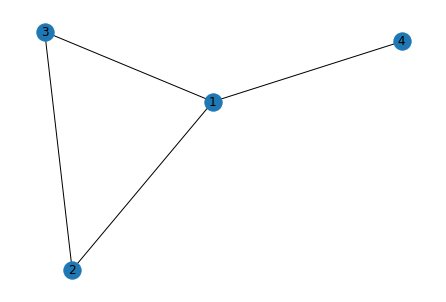

In [2]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4])

G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])

nx.draw(G, with_labels=True)


ネットワーク内の*経路*は、2 つのノードを接続する一連のエッジである。この単純な例では、ノード 3 と 4 を接続する経路が実際に少なくとも 1 つあることが明らかである。これは NetworkX のモジュール関数で確認できる。


In [3]:
nx.has_path(G, 3, 4)

True


2 つのノード間に複数の経路が存在する場合もある。同様にノード 3 と 4 を考慮すると、そのような「単純な」経路が 2 つある。


In [4]:
list(nx.all_simple_paths(G, 3, 4))

[[3, 2, 1, 4], [3, 1, 4]]


単純な経路とは、サイクルのない経路を指している。サイクルがあれば、必要に応じてサイクルを何回でも周回できるため、無限に多くの経路が存在することになる。

多くの場合、ノード間の*最短*経路に最も関心がある。重み無しネットワークでは、最短経路はエッジが最も少ない経路である。ノード 3 と 4 の間の 2 つの単純な経路のうち、一方が他方より短いことがわかる。NetworkX のモジュール関数でこの最短経路を取得できる。


In [5]:
nx.shortest_path(G, 3, 4)

[3, 1, 4]


経路長だけに注目する関数もある。


In [6]:
nx.shortest_path_length(G, 3, 4)

2


ここで経路長は、ノード数ではなく、経路の*エッジ*数によって定義されることに注意してほしい。

ノード $u$ および $v$ の場合、

    nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1

は真となる。


## 2. 連結成分

上記の単純なネットワークでは、*任意*の 2 つのノードごとに接続する経路を見つけることができる。これが、*連結*グラフの定義である。特定のグラフに関してその性質をグラフメゾットで確認できる。


In [7]:
nx.is_connected(G)

True


連結でないグラフもある。下はその一例である。


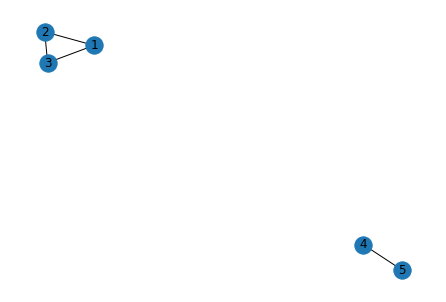

In [8]:
G = nx.Graph()

nx.add_cycle(G, (1,2,3))
G.add_edge(4,5)

nx.draw(G, with_labels=True)

In [9]:
nx.is_connected(G)

False


なお、連結していないノード間の経路を求めようとすると、NetworkX でエラーが発生する。


In [10]:
nx.has_path(G, 3, 5)

False

In [11]:
nx.shortest_path(G, 3, 5)

NetworkXNoPath: No path between 3 and 5.


このグラフでは、視覚的に 2 つの連結成分を識別できる。これを関数で確認してみよう。


In [12]:
nx.number_connected_components(G)

2


`nx.connected_components()` 関数はグラフを受け取り、連結成分ごとにセットが１つある、ノード名のセットのシーケンスを返すものである。次のリストの 2 つのセットが、上のグラフの図の 2 つの連結成分に対応していることを確認してみよう。


In [13]:
list(nx.connected_components(G))

[{1, 2, 3}, {4, 5}]


Python のセットに馴染みがない読者のための補足説明をすると、それは数学の集合と同じく、重複のないアイテムのコレクションである。ノード名は一意でなければならないため、集計の際に役立つ。他のコレクションと同様に、 `len` 関数を使用してセット内のアイテムの数をカウントできる。


In [14]:
components = list(nx.connected_components(G))
len(components[0])

3


ネットワークの*コア*とよばれることもある、最大連結成分に注目することがよくある。最大連結成分を取得するために、Python の組み込み `max` 関数が利用できる。Python の `max` 関数は、デフォルトで辞書順 (アルファベット順) にソートするが、ここでは役に立たない。サイズの順に並べ替えたときに最大連結成分が必要なので、キー引数として `len` を渡す。


In [15]:
max(nx.connected_components(G), key=len)

{1, 2, 3}


多くの場合、ノード名のリストだけで十分だが、最大連結成分で構成される実際のサブグラフが必要になる場合がある。これを取得する 方法の１つは、ノード名のリストを `G.subgraph()` 関数に渡すことである。


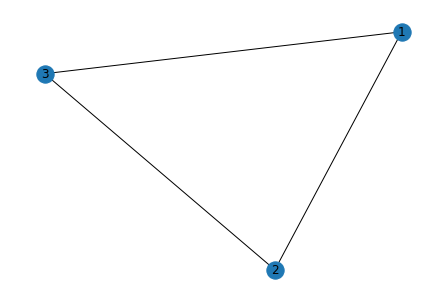

In [16]:
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)

nx.draw(core, with_labels=True)


タブ補完を使用している人は、 `nx.connected_component_subgraphs()` 関数があることにも気付くかもしれない。この関数も、コア部分グラフを取得するために使用できるが、最大連結成分にのみ注目する場合は、前に示した方法の方が効率的である。



# 3. 有向経路と成分

経路と連結成分に関するこれらのアイデアを有向グラフに拡張してみよう。



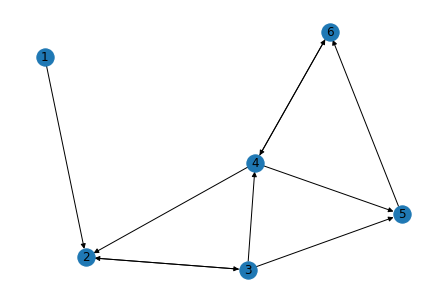

In [17]:
D = nx.DiGraph()
D.add_edges_from([
    (1,2),
    (2,3),
    (3,2), (3,4), (3,5),
    (4,2), (4,5), (4,6),
    (5,6),
    (6,4),
])
nx.draw(D, with_labels=True)


### 有向経路

有向グラフでは、任意のノード $u$ から任意のノード $v$ へのエッジは、$v$ から $u$ へのエッジが存在することを意味しない。経路は有向グラフのエッジ方向に従わなければならないため、同じ非対称性が経路に適用される。例えば、前に描いたグラフには、1 から 4 への経路がある一方、逆方向にはない。


In [18]:
nx.has_path(D, 1, 4)

True

In [19]:
nx.has_path(D, 4, 1)

False


経路を扱う他の NetworkX 関数も、この非対称性を考慮している。


In [20]:
nx.shortest_path(D, 2, 5)

[2, 3, 5]

In [21]:
nx.shortest_path(D, 5, 2)

[5, 6, 4, 2]


5 から 3 へのエッジがないため、5 から 2 への最短経路は 2 から 5 への最短経路を単純にバックトラックすることはできない。ノード 6 と 4 を経由するより長いルートをたどらなければならない。



### 有向成分



有向ネットワークには 2 種類の連結性がある。*強連結性*とは、ノードのすべてのペア間に有向経路が存在することを意味する。つまり、エッジの方向性に従って、任意のノードから他のノードに到達することを意味する。一方通行のネットワーク上にある、交通の流れに逆らって運転することはできない車を思い浮かべて欲しい。


In [22]:
nx.is_strongly_connected(D)

False


*弱連結性*とは、方向に関係なく、ノードのすべてのペア間に経路が存在することを意味する。一方通行のネットワーク上の歩行者について考えてみよう。歩行者は歩道を歩くので、車の進行方向は気にしない。


In [23]:
nx.is_weakly_connected(D)

True


強連結性を満たすネットワークは必ず弱連結性も満たす。一方で、この例に見られるように、その逆は常に真であるとは限らない。

無向グラフの `is_connected` 関数は、有向グラフを指定するとエラーになる。


In [ ]:
# これはエラーになる
nx.is_connected(D)

NetworkXNotImplemented: not implemented for directed type

有向グラフのケースでは、 `nx.connected_components` の代わりに `nx.weakly_connected_components` と `nx.strongly_connected_components` を使わなければならない。


In [25]:
list(nx.weakly_connected_components(D))

[{1, 2, 3, 4, 5, 6}]

In [26]:
list(nx.strongly_connected_components(D))

[{2, 3, 4, 5, 6}, {1}]


## 4. データセット: 米国の航空交通網

このリポジトリには、ネットワークのデータセットの例がいくつか含まれており、ここでは米国の航空交通網を取り上げる。


In [27]:
G = nx.read_graphml('../datasets/openflights/openflights_usa.graphml.gz')


このグラフのノードは空港で、 [IATA コード](https://en.wikipedia.org/wiki/List_of_airports_by_IATA_code:_A)で表される。2 つの空港を直接結ぶ定期便がある場合、これら2 つのノードはエッジで接続される。通常、ある地点へのフライトは帰りのフライトがあることを示唆しているため、このグラフは無向であると仮定する。

したがって、このグラフには
```
[('HOM', 'ANC'), ('BGM', 'PHL'), ('BGM', 'IAD'), ...]
```
ANC (アンカレッジ)、IAD (ワシントン・ダレス)
などのエッジがある。

これらのノードには、空港に関する情報が含まれた**属性**も付与されている。


In [28]:
G.nodes['IND']

{'name': 'Indianapolis International Airport',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'IATA': 'IND'}


ノード属性は辞書型で保存されるため、値は次のように個別にアクセスできる。


In [29]:
G.nodes['IND']['name']

'Indianapolis International Airport'


# 演習 1

インディアナポリスとアラスカ州フェアバンクス (FAI) 間の直行便があるか否かを判別するプログラムを作成せよ。ただし、直行便とは、経由地のない航路を意味する。



# 演習 2

インディアナポリスからアラスカ州フェアバンクスまで飛行機で移動する場合、フライト数が最も少ない経路を探るプログラムを作成せよ。



# 演習 3

米国内では、どの空港からどの空港へも、場合によっては乗り継ぎ便を使用して、移動することは可能か？言い換えると、すべての空港のペア間のに経路が存在するか？
